<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Random Forest Classification Model</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_rows', None)
plt.style.use('seaborn-darkgrid')

In [73]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [74]:
df.shape

(600, 6)

In [75]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [76]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [77]:
df.columns = df.columns.str.strip()
df.columns   #leading spaces are removed

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [78]:
df['Target'] = ''
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,
1,YES,Divorced,33700,134075,18,YES,
2,NO,Married,36925,160205,30,YES,
3,YES,Single,50190,193264,15,YES,
4,NO,Married,81002,27533,28,NO,


In [79]:
df.loc[df["Taxable.Income"] <= 30000, 'Target'] = 'Risky'
df.loc[df["Taxable.Income"] > 30000, 'Target'] = 'Safe'
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Safe
1,YES,Divorced,33700,134075,18,YES,Safe
2,NO,Married,36925,160205,30,YES,Safe
3,YES,Single,50190,193264,15,YES,Safe
4,NO,Married,81002,27533,28,NO,Safe
5,NO,Divorced,33329,116382,0,NO,Safe
6,NO,Divorced,83357,80890,8,YES,Safe
7,YES,Single,62774,131253,3,YES,Safe
8,NO,Single,83519,102481,12,YES,Safe
9,YES,Divorced,98152,155482,4,YES,Safe


In [80]:
numcols  = [cols for cols in df.columns if df[cols].dtype != 'O']
numcols

['Taxable.Income', 'City.Population', 'Work.Experience']

In [81]:
catcols = [cols for cols in df.columns if df[cols].dtype=='O']
catcols

['Undergrad', 'Marital.Status', 'Urban', 'Target']

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

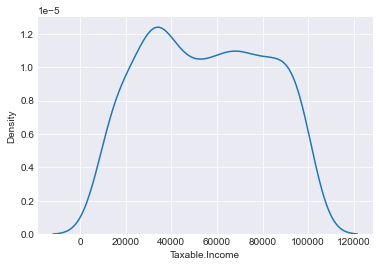

In [82]:
sns.kdeplot(df['Taxable.Income'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

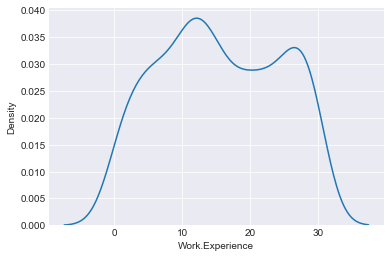

In [83]:
sns.kdeplot(df['Work.Experience'])

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

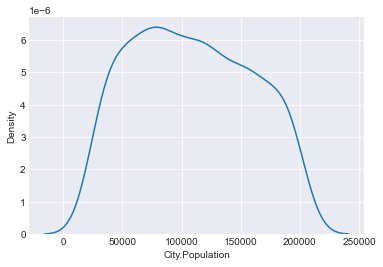

In [84]:
sns.kdeplot(df['City.Population'])

In [101]:
yesno = ['YES', 'NO']
marital =  ['Single', 'Married', 'Divorced']
 
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Target'], axis=1), 
    df.Target, test_size=0.30, 
    random_state = 2)



In [121]:
CT = ColumnTransformer([
    ('feature_scaling', MinMaxScaler(), ['Taxable.Income', 'City.Population', 'Work.Experience']),
    ('ordinal_encoding', OrdinalEncoder(categories=[yesno, marital, yesno]), ['Undergrad', 'Marital.Status', 'Urban'])  
],remainder = 'drop')

In [122]:
pipe  = Pipeline([ 
    ('column_transformer', CT),
    ('Model', RandomForestClassifier( n_estimators=3))
])

In [123]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('feature_scaling',
                                                  MinMaxScaler(),
                                                  ['Taxable.Income',
                                                   'City.Population',
                                                   'Work.Experience']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['YES',
                                                                              'NO'],
                                                                             ['Single',
                                                                              'Married',
                                                                              'Divorced'],
                                                                             ['YES',
                      

In [124]:
pipe.score(X_train, y_train)

0.9952380952380953

In [125]:
y_pred = pipe.predict(X_test)

In [126]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 38,   0],
       [  1, 141]], dtype=int64)

Text(102.58333333333333, 0.5, 'Predicted Values')

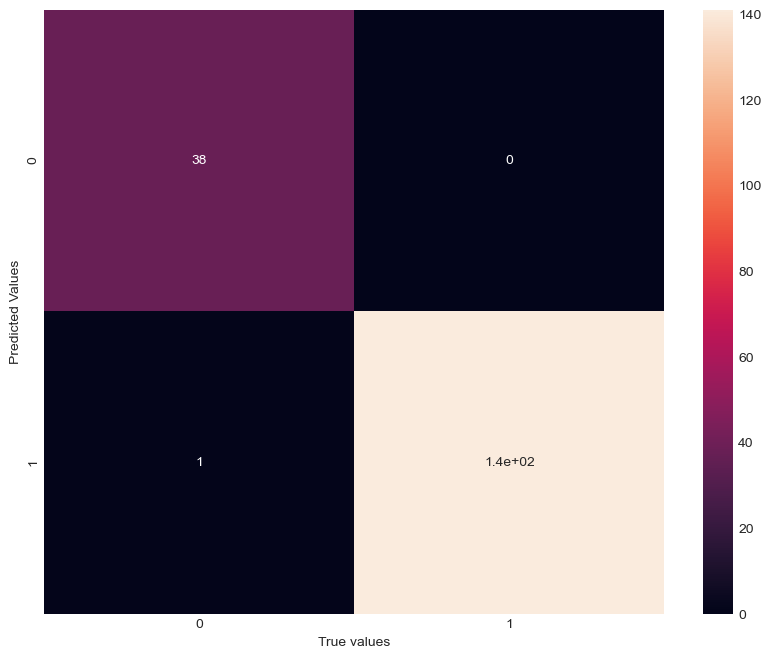

In [127]:
plt.figure(figsize=(10,8), dpi = 100)
sns.heatmap(cm, annot=True)
plt.xlabel('True values')
plt.ylabel('Predicted Values')

In [128]:
pipe.score(X_test, y_test)

0.9944444444444445

In [129]:
pipe.named_steps

{'column_transformer': ColumnTransformer(transformers=[('feature_scaling', MinMaxScaler(),
                                  ['Taxable.Income', 'City.Population',
                                   'Work.Experience']),
                                 ('ordinal_encoding',
                                  OrdinalEncoder(categories=[['YES', 'NO'],
                                                             ['Single',
                                                              'Married',
                                                              'Divorced'],
                                                             ['YES', 'NO']]),
                                  ['Undergrad', 'Marital.Status', 'Urban'])]),
 'Model': RandomForestClassifier(n_estimators=3)}

In [130]:
pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('feature_scaling',
                                                  MinMaxScaler(),
                                                  ['Taxable.Income',
                                                   'City.Population',
                                                   'Work.Experience']),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['YES',
                                                                              'NO'],
                                                                             ['Single',
                                                                              'Married',
                                                                              'Divorced'],
                                                                      

In [131]:
pipe.n_features_in_

6

In [132]:
pipe.steps

[('column_transformer',
  ColumnTransformer(transformers=[('feature_scaling', MinMaxScaler(),
                                   ['Taxable.Income', 'City.Population',
                                    'Work.Experience']),
                                  ('ordinal_encoding',
                                   OrdinalEncoder(categories=[['YES', 'NO'],
                                                              ['Single',
                                                               'Married',
                                                               'Divorced'],
                                                              ['YES', 'NO']]),
                                   ['Undergrad', 'Marital.Status', 'Urban'])])),
 ('Model', RandomForestClassifier(n_estimators=3))]

In [148]:
pipe.named_steps['column_transformer'].transformers_[1][2]

['Undergrad', 'Marital.Status', 'Urban']

In [156]:
pipe.named_steps['column_transformer'].transformers_[0][1].get_params()

{'copy': True, 'feature_range': (0, 1)}